# Excercise 12: Logistic Regression

## Initialization

In [2]:
import numpy as np
# import libraries
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the data
data_credit = pd.read_csv("../data/GermanCredit.csv", sep=";", decimal=",")

In [4]:
data_credit.columns

Index(['Class', 'fClass', 'A00Amount', 'A00Amount100', 'A01Duration', 'A02Age',
       'A03IRP', 'A04ResDur', 'A05NumExCred', 'A06NumPeopMaint', 'A07Teleph',
       'A08FrgnWork', 'A09CheckAccStat', 'A10History', 'A11Purpose',
       'A12Savings', 'A13EmployDurat', 'A14Personal', 'A15Gender',
       'A16OtherDebtGuar', 'A17Property', 'A18OtherInstallPlan', 'A19Housing',
       'A20Job', 'fA07Teleph', 'fA08FrgnWork', 'fA09CheckAccStat',
       'fA10History', 'fA11Purpose', 'fA12Savings', 'fA13EmployDurat',
       'fA14Personal', 'fA15Gender', 'fA16OtherDebtGuar', 'fA17Property',
       'fA18OtherInstallPlan', 'fA19Housing', 'fA20Job', 'Training'],
      dtype='object')

In [5]:
data_credit

,Class,fClass,A00Amount,A00Amount100,A01Duration,A02Age,A03IRP,A04ResDur,A05NumExCred,A06NumPeopMaint,...,fA12Savings,fA13EmployDurat,fA14Personal,fA15Gender,fA16OtherDebtGuar,fA17Property,fA18OtherInstallPlan,fA19Housing,fA20Job,Training
0,0,Good,1169,11.69,6,67,4,4,2,1,...,unknown/no savings account,>=7,male: single,male,none,real estate,none,own,skilled employee/official,0
1,1,Bad,5951,59.51,48,22,2,2,1,1,...,<100,"[1,4)",female,female,none,real estate,none,own,skilled employee/official,0
2,0,Good,2096,20.96,12,49,2,3,1,2,...,<100,"[4,7)",male: single,male,none,real estate,none,own,"unskilled, resident",0
3,0,Good,7882,78.82,42,45,2,4,1,2,...,<100,"[4,7)",male: single,male,guarantor,building society savings agreement/life insurance,none,for free,skilled employee/official,1
4,1,Bad,4870,48.70,24,53,3,4,2,2,...,<100,"[1,4)",male: single,male,none,unknown/no property,none,for free,skilled employee/official,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,Good,1736,17.36,12,31,3,4,1,1,...,<100,"[4,7)",female,female,none,real estate,none,own,"unskilled, resident",0
996,0,Good,3857,38.57,30,40,4,4,1,1,...,<100,"[1,4)",male: divorced/separated,male,none,building society savings agreement/life insurance,none,own,management/self-employed/highly qualified empl...,1
997,0,Good,804,8.04,12,38,4,4,1,1,...,<100,>=7,male: single,male,none,car or other,none,own,skilled employee/official,0
998,1,Bad,1845,18.45,45,23,4,4,1,1,...,<100,"[1,4)",male: single,male,none,unknown/no property,none,for free,skilled employee/official,1


## 1 Regression using single covariate

<AxesSubplot: xlabel='Class', ylabel='A00Amount100'>

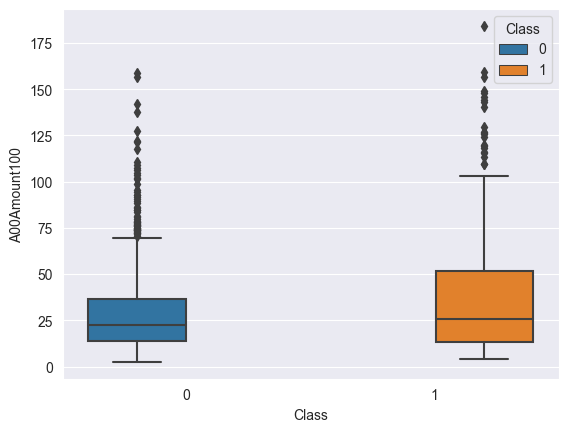

In [6]:
sns.boxplot(data_credit, x="Class", y="A00Amount100", hue="Class")

<AxesSubplot: xlabel='A00Amount100', ylabel='Class'>

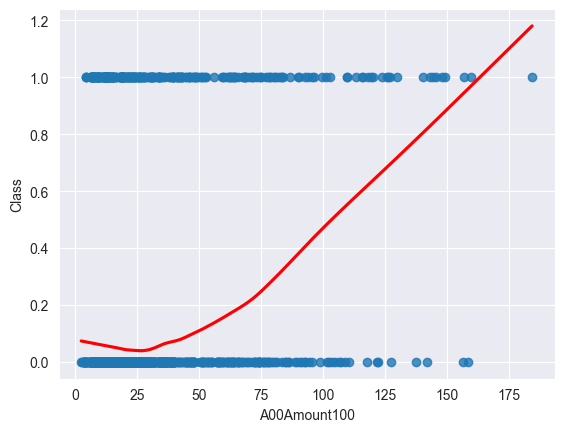

In [7]:
sns.regplot(data_credit, y="Class", x="A00Amount100", line_kws={"color": "red"}, lowess=True)

### 1.2 Model Estimation

In [12]:
import statsmodels.api as sm

In [13]:
features = "A00Amount100"
X, y = data_credit[features], data_credit["Class"]
X = sm.add_constant(X)
m_1 = sm.GLM(y, X, family=sm.families.Binomial()).fit()

The following cell outputs the results of our generalized linear model

In [16]:
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -599.53
Date:                Sun, 22 Jan 2023   Deviance:                       1199.1
Time:                        20:33:50   Pearson chi2:                 1.00e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02241
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2294      0.108    -11.348      0.000      -1.442      -1.017
A00Amount100     0.0112      0.002      4.751      0.000       0.007       0.016
================================================================================
"""

array([0.22629085])

Depending on the specific link function, the results do have different interpretations. Since we've set
the link to binomial, the coefficients express the relative change in the log-odds ratio. Confidence
intervals are the very same as in linear regression. For every extra 100 Deutsche marks of loan, the
log-odds of the rise by about 0.0112.

In [56]:
from collections import namedtuple
def transform_logodds(x):

    res = namedtuple("CoefTransformations", ['odd_r', 'prob'])
    odd_r = np.exp(x)
    prob = odd_r/(1-odd_r)

    return res(odd_r, prob)

The interpretation of the constant is following: had the *A00Amount100* been set to 0, the log odds of belonging to the positive class is non-zero. Namely, the probability is about


In [63]:
transform_logodds(m_1.params[0])[0]

0.29247533903832923

In [85]:
smpl = [1, 10, 100]
for element in smpl:
    odds = m_1.predict([1, element])[0]
    prob = odds/(1-odds)
    print(f"The probability that debt in the amount of {element*100} DEM won't be repaid: "
          f"{prob:.4f}")

The probability that debt in the amount of 100 DEM won't be repaid: 0.2958
The probability that debt in the amount of 1000 DEM won't be repaid: 0.3271
The probability that debt in the amount of 10000 DEM won't be repaid: 0.8954


In [91]:
m_1.conf_int().apply(lambda x: np.exp(x))

,0,1
const,0.236525,0.361661
A00Amount100,1.006595,1.015931
